In [1]:
from dotenv import load_dotenv
import os

load_dotenv()

openai_api_key = os.getenv("OPENAI_API_KEY")

In [2]:
from typing import List, Annotated, Literal
from typing_extensions import TypedDict
from langchain_openai import ChatOpenAI
from langchain_core.messages import AIMessage, SystemMessage, HumanMessage, ToolMessage
from langgraph.checkpoint.memory import MemorySaver
from langgraph.graph import StateGraph, START, END
from pydantic import BaseModel

In [4]:
class State(TypedDict):
    counter: int
    alphabet: list[str]

graph_builder = StateGraph(State)

In [2]:
from typing import List, Annotated, Literal
from typing_extensions import TypedDict
from langgraph.graph import StateGraph, START, END
import operator

class State(TypedDict):
    counter: int
    alphabet: list[str]

def node_a(state: State):
    state['counter'] += 1
    state['alphabet'] = ["Hello"]
    return state

graph_builder = StateGraph(State)

graph_builder.add_node('chatbot', node_a)
graph_builder.add_edge(START, 'chatbot')
graph_builder.add_edge('chatbot', END )

graph = graph_builder.compile()


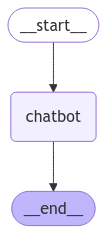

In [3]:
from IPython.display import Image, display

try:
    display(Image(graph.get_graph().draw_mermaid_png()))
except Exception:
    pass

In [4]:
initial_state = {
    "counter": 0,
    "alphabet": []
}

state = initial_state

for _ in range(3):
    state = graph.invoke(state)
    print(state)

{'counter': 1, 'alphabet': ['Hello']}
{'counter': 2, 'alphabet': ['Hello']}
{'counter': 3, 'alphabet': ['Hello']}


In [7]:
class State(TypedDict):
    counter: int
    alphabet: Annotated[list[str], operator.add]

def node_b(state: State):
    state['counter'] += 1
    state['alphabet'] = ['Hello']
    return state

graph_builder = StateGraph(State)

graph_builder.add_node('chatbot', node_b)
graph_builder.add_edge(START, 'chatbot')
graph_builder.add_edge('chatbot', END )

graph = graph_builder.compile()

In [8]:
initial_state = {
    "counter": 0,
    "alphabet": []
}

state = initial_state

for _ in range(3):
    state = graph.invoke(state)
    print(state)

{'counter': 1, 'alphabet': ['Hello']}
{'counter': 2, 'alphabet': ['Hello', 'Hello']}
{'counter': 3, 'alphabet': ['Hello', 'Hello', 'Hello']}


In [9]:
from typing import Annotated
from langchain_openai import ChatOpenAI
from typing_extensions import TypedDict

from langgraph.graph import StateGraph
from langgraph.graph.message import add_messages

class State(TypedDict):
    messages: Annotated[list, add_messages]

graph_builder = StateGraph(State)

llm = ChatOpenAI(model="gpt-4o-mini")

def chatbot(state: State):
    return {"messages": [llm.invoke(state["messages"])]}

graph_builder.add_node("chatbot", chatbot)
graph_builder.set_entry_point("chatbot")
graph_builder.set_finish_point("chatbot")
graph = graph_builder.compile()

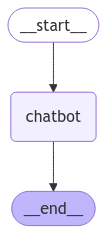

In [10]:
from IPython.display import Image, display

try:
    display(Image(graph.get_graph().draw_mermaid_png()))
except Exception:
    pass

In [11]:
while True:
    user_input = input("User: ")
    if user_input.lower() in ["quit", "exit", "q"]:
        print("Goob bye!")
        break

    for event in graph.stream({"messages": ("user", user_input)}):
        for value in event.values():
            print("Assistant: ", value["messages"][-1].content)

Assistant:  Yes, an AI agent refers to a software system that can perceive its environment, reason about it, and take actions to achieve specific goals. AI agents can operate in various domains, such as virtual environments, robotics, and gaming. They typically utilize techniques from machine learning, natural language processing, and computer vision to interact with the world and improve their performance over time.

AI agents can be classified into different types, including:

1. **Reactive Agents**: These agents respond to stimuli from the environment without maintaining an internal state. They operate based on predefined rules.

2. **Deliberative Agents**: These have a model of their environment and can use this knowledge to make informed decisions. They often involve planning and reasoning.

3. **Learning Agents**: These agents can improve their performance over time by learning from experience, often employing techniques such as reinforcement learning.

4. **Multi-Agent Systems**

In [15]:
from langchain_openai import ChatOpenAI
from langgraph.graph import MessagesState

graph_builder = StateGraph(MessagesState)

llm = ChatOpenAI(model="gpt-4o-mini")

def chatbot(state: State):
    return {"messages": [llm.invoke(state["messages"])]}

graph_builder.add_node("chatbot", chatbot)
graph_builder.set_entry_point("chatbot")
graph_builder.set_finish_point("chatbot")
graph = graph_builder.compile()

In [16]:
while True:
    user_input = input("User: ")
    if user_input.lower() in ["quit", "exit", "q"]:
        print("Goob bye!")
        break

    for event in graph.stream({"messages": ("user", user_input)}):
        for value in event.values():
            print("Assistant: ", value["messages"][-1].content)

Assistant:  Building a multi-agent system (MAS) involves several key steps and considerations. A multi-agent system is a system composed of multiple interacting agents that can be either homogeneous or heterogeneous, and it's used for various applications, including robotics, artificial intelligence, distributed control, and problem-solving tasks. Here’s a structured approach to building a multi-agent system:

### 1. Define Objectives and Requirements
- **Identify Purpose**: Clearly define the goals of your multi-agent system (e.g., coordination, competition, cooperation).
- **User Requirements**: Gather requirements from stakeholders to understand their needs.

### 2. Design the Agent Architecture
- **Agent Types**: Decide on the types of agents needed. This could include reactive agents, cognitive agents, mobile agents, or static agents.
- **Internal Structure**: Determine how each agent will operate internally. This might include perception, decision-making, and action mechanisms.
-

In [18]:
from langchain_openai import ChatOpenAI
from langgraph.graph import MessagesState

class State(MessagesState):
    counter: int

graph_builder = StateGraph(State)

llm = ChatOpenAI(model="gpt-4o-mini")

def chatbot(state: State):
    state['counter'] = state.get('counter', 0) + 1
    return {
        "messages": [llm.invoke(state["messages"])],
        "counter": state['counter']
    }

graph_builder.add_node("chatbot", chatbot)
graph_builder.set_entry_point("chatbot")
graph_builder.set_finish_point("chatbot")
graph = graph_builder.compile()

In [19]:
from langchain_core.messages import HumanMessage

initial_state = {
    "messages": [HumanMessage(content="Hello!")],
    "counter": 0
}

result = graph.invoke(initial_state)

print(f"Final state: {result}")

Final state: {'messages': [HumanMessage(content='Hello!', additional_kwargs={}, response_metadata={}, id='fa0f7810-bf76-454b-bad3-2b2ac08b5301'), AIMessage(content='Hello! How can I assist you today?', additional_kwargs={'refusal': None}, response_metadata={'token_usage': {'completion_tokens': 10, 'prompt_tokens': 9, 'total_tokens': 19, 'completion_tokens_details': {'accepted_prediction_tokens': 0, 'audio_tokens': 0, 'reasoning_tokens': 0, 'rejected_prediction_tokens': 0}, 'prompt_tokens_details': {'audio_tokens': 0, 'cached_tokens': 0}}, 'model_name': 'gpt-4o-mini-2024-07-18', 'system_fingerprint': 'fp_72ed7ab54c', 'finish_reason': 'stop', 'logprobs': None}, id='run-5d127c50-3bdf-4e28-993d-067e7a0ef0ca-0', usage_metadata={'input_tokens': 9, 'output_tokens': 10, 'total_tokens': 19, 'input_token_details': {'audio': 0, 'cache_read': 0}, 'output_token_details': {'audio': 0, 'reasoning': 0}})], 'counter': 1}


In [20]:
state = initial_state
for _ in range(3):
    state = graph.invoke(state)
    print(f"Counter: {state['counter']}")
    print(f"Last message: {state['messages'][-1].content}")
    print("---")

Counter: 1
Last message: Hello! How can I assist you today?
---
Counter: 2
Last message: Hello! How can I assist you today?
---
Counter: 3
Last message: Hello! How can I assist you today?
---


END